### Solving Atrapalhando Fugitivos using Simulated Annealing

In [27]:
using DataStructures
using Random
using Printf

## Dijkstra

Directed Graph is represented as adjacency matrix:  
g[0,1] = -1 -> no edge from 0 to 1  
g[0,1] = v -> edge with weight v from 0 to 1  

In [2]:
function addr(i, j, n)
    return (i-1) * n + j
end

const INT_MAX = typemax(Int64)

function resToDict(R, S)
    resArray = []
    for resGroup in R
        valRes = resGroup[1]
        numRes = resGroup[2]
        for res in 1:numRes
            push!(resArray, valRes)
        end
    end

    resDict = Dict{Int64, Int64}()
    for i in 1:length(S)
        resDict[S[i]] = resArray[i]
    end

    return resDict
end

# Dijkstra algorithm implemented using priority queue (min-heap)
function dijkstraWithResourcesPQ(g, V, start, R, S, delta_t)
    # Initialization
    num_vertices = length(V)
    dist = fill(INT_MAX, num_vertices)
    visited = fill(false, num_vertices)
    dist[start] = 0 

    # Generating Q array as min-heap
    Q = PriorityQueue{Int64, Int64}()
    Q[start] = dist[start]

    # Generate resource dictionary
    resDict = resToDict(R, S)

    # Main loop
    while !isempty(Q)
        u, du = peek(Q)
        dequeue!(Q)
        if !visited[u]
            visited[u] = true
            adjacent_u = g[u, :]
            for v in 1:length(adjacent_u)
                if adjacent_u[v] > -1
                    cost_to_v = du + adjacent_u[v]
                    # Apply resource
                    if haskey(resDict, u) && du >= resDict[u]
                        cost_to_v += delta_t
                    end
                    # Update distances vector
                    if dist[v] > cost_to_v
                        dist[v] = cost_to_v
                        Q[v] = dist[v]
                    end
                end
            end 
        end  
    end 

    return dist
end

dijkstraWithResources (generic function with 1 method)

## Simulated Annealing

In [48]:
function calcNumResources(R)
    k = 0
    for group in R
        k += group[2]
    end
    
    return k
end

function numReachableVertices(g, start, t_max, R, S, delta_t)
    distances = dijkstraWithResources(g, start, R, S, delta_t)
    numVertices = 0
    for d in distances
        if d <= t_max
            numVertices += 1
        end
    end
    
    return numVertices
end

function generateNextSolution(S, num_vertices)
    n = length(S)
    index = rand(1:n)
    S_next = copy(S)

    random_vertex = rand(1:num_vertices)
    while random_vertex in S
        random_vertex = rand(1:num_vertices)
    end

    S_next[index] = random_vertex

    return S_next
end

function simulatedAnnealing(S, T, Tf, r, I)
    S_current = copy(S)
    F_current = numReachableVertices(graph, start, t_max, R, S_current, delta_t)
    while T > Tf
        for _ in 1:I
            S_next = generateNextSolution(S_current, num_vertices)
            F_next = numReachableVertices(graph, start, t_max, R, S_next, delta_t)
            F_current = numReachableVertices(graph, start, t_max, R, S_current, delta_t)
            delta_f = F_next - F_current
            if delta_f <= 0
                S_current = S_next
            else
                if exp(-delta_f/T) > rand()
                    S_current = S_next
                end 
            end 
        end
        T *= r
    end
    
    return F_current
end

generateNextSolution (generic function with 1 method)

In [ ]:
@printf("T=%.4f, F_current=%d, F_next=%d\n", T, F_current, F_next)

In [113]:
# Instance parameters
n = 4
num_vertices = n^2
start = 1
t_max = 10
delta_t = 5
R = [(5, 2), (10, 2)]
k = calcNumResources(R)

4

In [22]:
graph = fill(-1, (num_vertices, num_vertices))
graph[1, 2] = 2
graph[1, 5] = 1
graph[2, 3] = 1
graph[2, 6] = 2
graph[3, 4] = 1
graph[3, 7] = 1
graph[4, 8] = 3
graph[5, 6] = 2
graph[5, 9] = 3
graph[6, 10] = 1
graph[7, 11] = 3
graph[8, 12] = 1
graph[9, 13] = 1
graph[10, 11] = 2
graph[12, 16] = 2
graph[13, 14] = 5
graph[14, 15] = 1
graph[15, 16] = 1

display(graph)

16×16 Matrix{Int64}:
 -1   2  -1  -1   1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1   1  -1  -1   2  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1   1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1   3  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1   2  -1  -1   3  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   3  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   2  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   2
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   5  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1
 -1  -1  -1  -1  -1

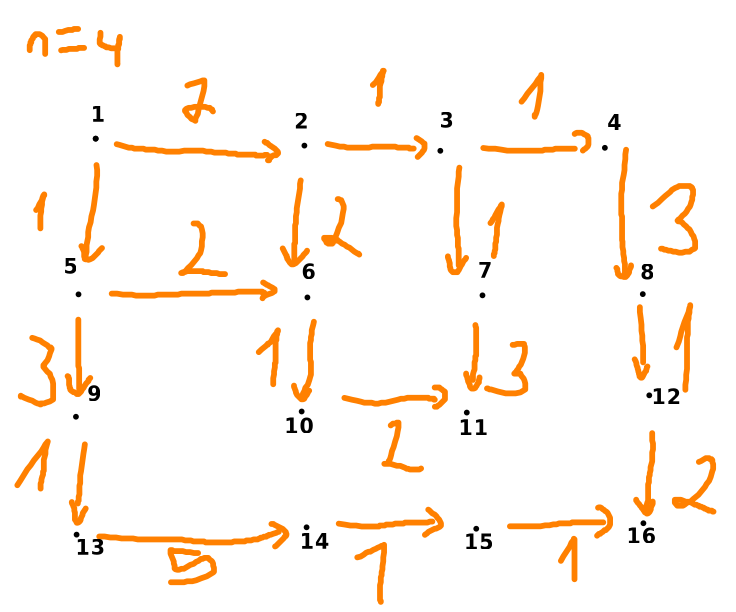

In [142]:
# Simulated Annealing parameters
Random.seed!(11235813)
S = randperm(num_vertices)[1:k]
T = 10000
Tf = 0.001
r = 0.99
I = 1000

1000

In [145]:
simulatedAnnealing(S, T, Tf, r, I)

12